In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50)  # show more rows
pd.set_option('display.max_columns', 50)  # show more columns

students = pd.read_csv('stud_math.csv')

# Data pre-processing

In [2]:
def fill_address(row):
    if pd.isnull(row['address']):
        if row['traveltime'] == '1':
            return 'U'
        if row['traveltime'] == '2':
            return 'U'
        if row['traveltime'] == '3':
            return 'R'
        if row['traveltime'] == '4':
            return 'R'
        else:
            return 'U'
    return row['address']


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=students,
                ax=ax)
    plt.xticks()
    ax.set_title('Boxplot for ' + column)
    plt.show()
    print()


def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Considered the Bonferoni amendment
            print('Найдены статистически значимые различия для колонки', column)
            break

In [3]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# score

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

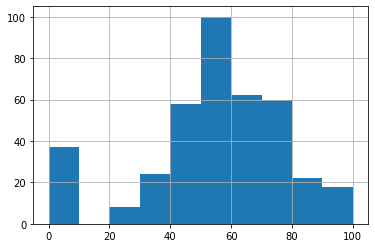

In [4]:
# Let's see the distribution of the target parameter 'score'
students.score.hist()
students.score.describe()

In [5]:
# Remove the rows where there are no score values
# Also remove the rows with gaps for those columns where there are few gaps: 'Medu', 'studytime', 'goout'

students.dropna(subset=['Medu', 'studytime', 'goout', 'score'], inplace=True)

# Thus, we lost less than 6% of data

# Delete unnecessary columns

In [6]:
# Let's pre-analyze the correlation of variables.
# Remember that most of the variables are categorical, but the categories are expressed in numbers.

students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.132908,-0.127165,0.078644,-0.021660,0.194558,0.021660,0.055717,0.012310,0.130428,-0.068605,0.097406,-0.148872
Medu,-0.132908,1.000000,0.260874,-0.175731,0.089621,-0.229287,-0.089621,0.004299,0.034064,0.057237,-0.051376,-0.014921,0.203371
Fedu,-0.127165,0.260874,1.000000,0.034168,0.063967,-0.144805,-0.063967,0.048899,-0.062019,-0.022940,0.018355,0.002109,0.070375
traveltime,0.078644,-0.175731,0.034168,1.000000,-0.105533,0.054697,0.105533,-0.034189,-0.019660,0.045204,-0.022449,-0.049902,-0.075329
studytime,-0.021660,0.089621,0.063967,-0.105533,1.000000,-0.187066,-1.000000,0.049950,-0.126741,-0.057161,-0.079694,-0.024344,0.124452
failures,0.194558,-0.229287,-0.144805,0.054697,-0.187066,1.000000,0.187066,-0.037380,0.095842,0.117662,0.088503,0.057989,-0.348736
"studytime, granular",0.021660,-0.089621,-0.063967,0.105533,-1.000000,0.187066,1.000000,-0.049950,0.126741,0.057161,0.079694,0.024344,-0.124452
famrel,0.055717,0.004299,0.048899,-0.034189,0.049950,-0.037380,-0.049950,1.000000,0.171923,0.078717,0.088200,-0.083057,0.071598
freetime,0.012310,0.034064,-0.062019,-0.019660,-0.126741,0.095842,0.126741,0.171923,1.000000,0.276779,0.098624,0.015784,0.013326
goout,0.130428,0.057237,-0.022940,0.045204,-0.057161,0.117662,0.057161,0.078717,0.276779,1.000000,-0.003303,-0.046354,-0.141110


In [7]:
# Since there is a strong negative correlation between 'studytime' and 'studytime,granular',
# remove column 'studytime,granular'

students.drop(['studytime, granular'], axis=1, inplace=True)

# numerical variable

There are three numerical variables: age, absences, score

## age

count    373.000000
mean      16.675603
std        1.278175
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

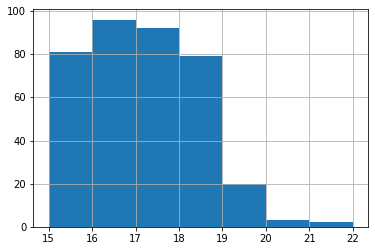

In [8]:
students.age.hist(bins=7)
students.age.describe()
# no outliers

## absences

count    364.000000
mean       7.406593
std       24.042652
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

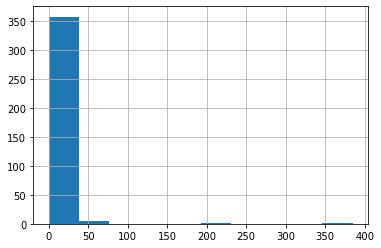

In [9]:
students.absences.hist()
students.absences.describe()

# There are outliers

In [10]:
# Fill missing values in column 'absences' by the most frequent value
students['absences'].fillna(
    students['absences'].value_counts().index[0], inplace=True)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


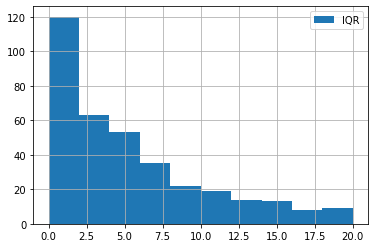

In [11]:
# Delete outliers for 'absences'

perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
IQR = perc75 - students.absences.quantile(0.25)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

students.absences.loc[students.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 20), label='IQR')

plt.legend()

In [12]:
# Filter data
students = students.loc[students.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [13]:
# Let's see the correlation of quantitative parameters
students_corr = students[['age', 'absences', 'score']].copy()
students_corr.corr()

,age,absences,score
age,1.000000,0.153058,-0.156112
absences,0.153058,1.000000,0.071100
score,-0.156112,0.071100,1.000000


We see that the correlations of age and abcences with score are very weak, so these parameters could be ignored in the model.

# nominal variables

In [14]:
# Let's see the distribution of nominative parameters
display(students.school.value_counts(),
        students.sex.value_counts(),
        students.address.value_counts(),
        students.famsize.value_counts(),
        students.Pstatus.value_counts(),
        students.Medu.value_counts(),
        students.Fedu.value_counts(),
        students.Mjob.value_counts(),
        students.Fjob.value_counts(),
        students.reason.value_counts(),
        students.guardian.value_counts(),
        students.traveltime.value_counts(),
        students.studytime.value_counts(),
        students.failures.value_counts(),
        students.schoolsup.value_counts(),
        students.famsup.value_counts(),
        students.paid.value_counts(),
        students.activities.value_counts(),
        students.nursery.value_counts(),
        students.higher.value_counts(),
        students.internet.value_counts(),
        students.romantic.value_counts(),
        students.famrel.value_counts(),
        students.freetime.value_counts(),
        students.health.value_counts())

GP    312
MS     44
Name: school, dtype: int64

F    182
M    174
Name: sex, dtype: int64

U    265
R     78
Name: address, dtype: int64

GT3    235
LE3     99
Name: famsize, dtype: int64

T    291
A     30
Name: Pstatus, dtype: int64

4.0    119
2.0     93
3.0     88
1.0     53
0.0      3
Name: Medu, dtype: int64

2.0     97
3.0     82
4.0     81
1.0     70
0.0      2
40.0     1
Name: Fedu, dtype: int64

other       117
services     86
at_home      54
teacher      51
health       31
Name: Mjob, dtype: int64

other       180
services     88
teacher      26
at_home      16
health       13
Name: Fjob, dtype: int64

course        129
reputation     90
home           89
other          32
Name: reason, dtype: int64

mother    224
father     82
other      20
Name: guardian, dtype: int64

1.0    217
2.0     86
3.0     20
4.0      7
Name: traveltime, dtype: int64

2.0    172
1.0     98
3.0     59
4.0     27
Name: studytime, dtype: int64

0.0    272
1.0     40
3.0     14
2.0     12
Name: failures, dtype: int64

no     304
yes     43
Name: schoolsup, dtype: int64

yes    198
no     125
Name: famsup, dtype: int64

no     183
yes    136
Name: paid, dtype: int64

yes    178
no     164
Name: activities, dtype: int64

yes    270
no      71
Name: nursery, dtype: int64

yes    321
no      17
Name: higher, dtype: int64

yes    275
no      49
Name: internet, dtype: int64

no     218
yes    111
Name: romantic, dtype: int64

 4.0    163
 5.0     90
 3.0     53
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64

3.0    139
4.0    106
2.0     59
5.0     33
1.0     13
Name: freetime, dtype: int64

5.0    128
3.0     81
4.0     55
1.0     42
2.0     36
Name: health, dtype: int64

There are outliers for 'Fedu' and 'famrel'

For each nominative variable, we have from 2 to 5 unique values, excluding errors.

## address

In [15]:
# Fill in the missing values in the 'address' depending on the 'traveltime'

students['address'] = students.apply(fill_address, axis=1)

## Pstatus, schoolsup, nursery, higher, internet, failures, Mjob, Fjob

In [16]:
# For variables where one of the options takes a value of 280 or more (75% of the entire sample),
# fill in the gaps with this value
# Mjob and Fjob fill in 'other': it is the most common option, and probability for this option is higher than for any other

students['Pstatus'].fillna(
    students['Pstatus'].value_counts().index[0], inplace=True)

students['schoolsup'].fillna(
    students['schoolsup'].value_counts().index[0], inplace=True)

students['nursery'].fillna(
    students['nursery'].value_counts().index[0], inplace=True)

students['higher'].fillna(
    students['higher'].value_counts().index[0], inplace=True)

students['internet'].fillna(
    students['internet'].value_counts().index[0], inplace=True)

students['failures'].fillna(
    students['failures'].value_counts().index[0], inplace=True)

students['Mjob'].fillna(students['Mjob'].value_counts().index[0], inplace=True)

students['Fjob'].fillna(students['Fjob'].value_counts().index[0], inplace=True)

## famsize, reason, guardian, famsup, paid, activities, romantic

In [17]:
# In columns with text fill missing values with None

students.famsize = students.famsize.apply(lambda x: None if pd.isnull(x)
                                          else None if str.lower(x) == 'nan'
                                          else None if x.strip == ''
                                          else x.strip())

students.reason = students.reason.apply(lambda x: None if pd.isnull(x)
                                        else None if str.lower(x) == 'nan'
                                        else None if x.strip == ''
                                        else x.strip())

students.guardian = students.guardian.apply(lambda x: None if pd.isnull(x)
                                            else None if str.lower(x) == 'nan'
                                            else None if x.strip == ''
                                            else x.strip())

students.famsup = students.famsup.apply(lambda x: None if pd.isnull(x)
                                        else None if str.lower(x) == 'nan'
                                        else None if x.strip == ''
                                        else x.strip())

students.paid = students.paid.apply(lambda x: None if pd.isnull(x)
                                    else None if str.lower(x) == 'nan'
                                    else None if x.strip == ''
                                    else x.strip())

students.activities = students.activities.apply(lambda x: None if pd.isnull(x)
                                                else None if str.lower(x) == 'nan'
                                                else None if x.strip == ''
                                                else x.strip())

students.romantic = students.romantic.apply(lambda x: None if pd.isnull(x)
                                            else None if str.lower(x) == 'nan'
                                            else None if x.strip == ''
                                            else x.strip())

## Fedu, traveltime, famrel, freetime, health

In [18]:
# In categorical variables where unique values are expressed as numbers, replace the missing values with None
students.Fedu = students.Fedu.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                    else x)

students.traveltime = students.traveltime.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                                else x)

students.famrel = students.famrel.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                        else x)

students.freetime = students.freetime.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                            else x)

students.health = students.health.apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                        else x)

In [19]:
# Remove the outlier from 'Fedu'
# See the index of the row with the outlier

students[students.Fedu == 40.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,T,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [20]:
# Remove the outlier

students.drop([11], axis=0, inplace=True)

In [21]:
# Remove the outlier from 'famrel'
# See the index of the row with the outlier

students[students.famrel == -1.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,T,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [22]:
# Remove the outlier

students.drop([25], axis=0, inplace=True)

Let's see the distribution of 'score' for each unique value of each nominative variable

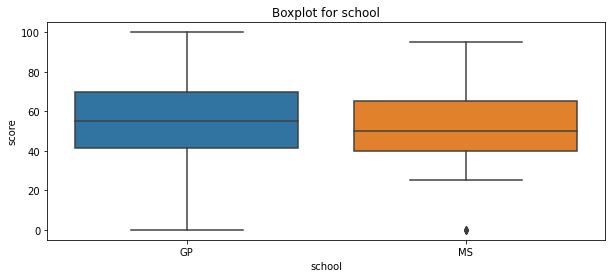

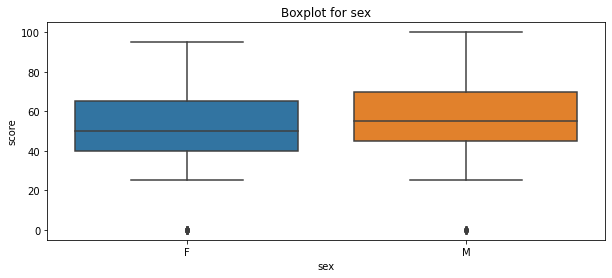

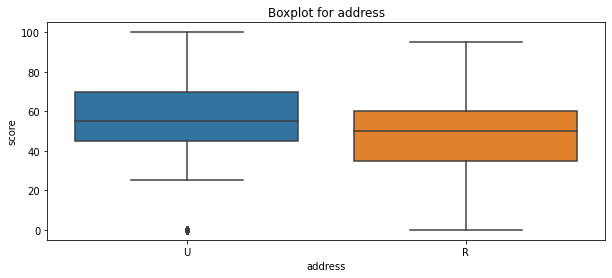

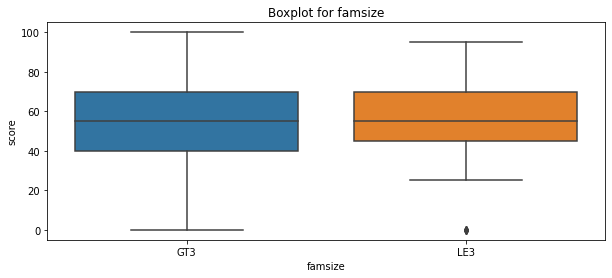

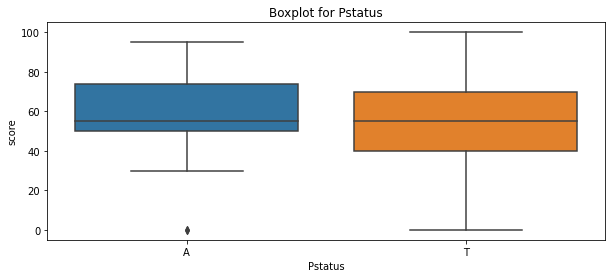

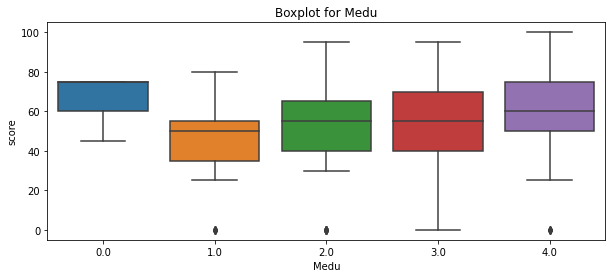

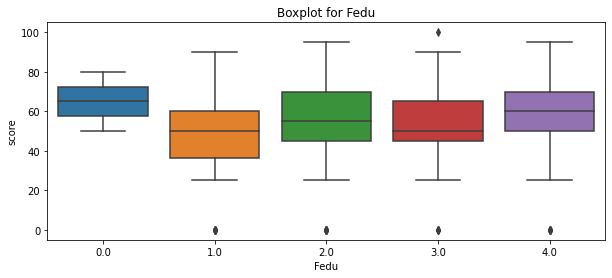

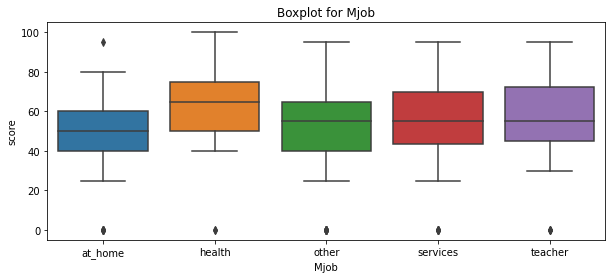

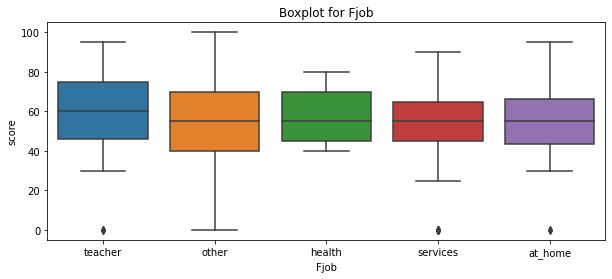

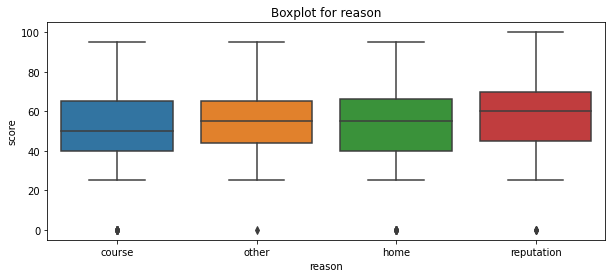

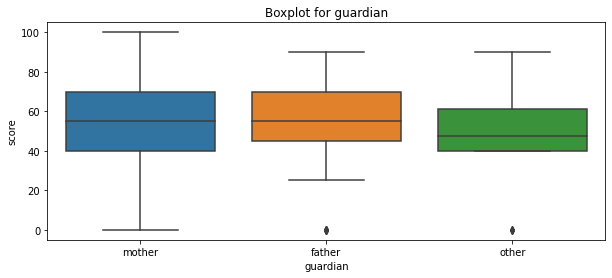

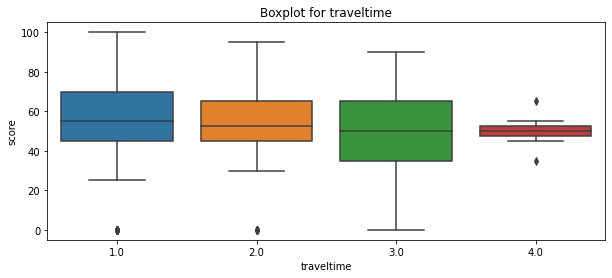

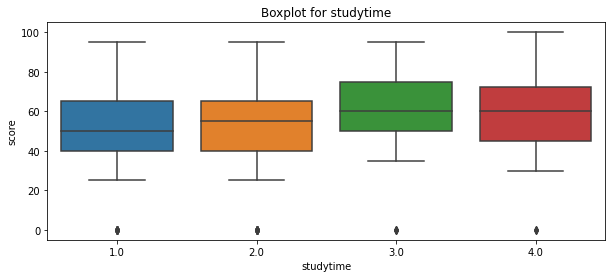

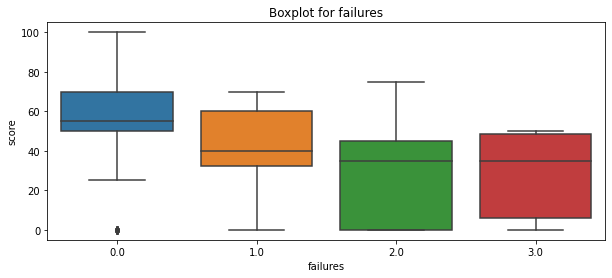

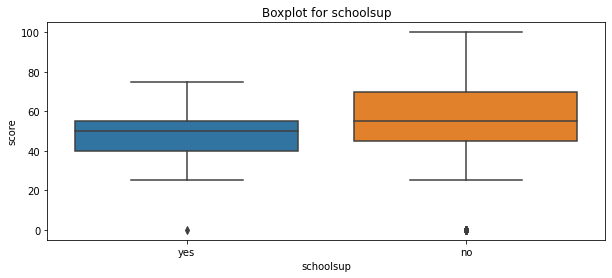

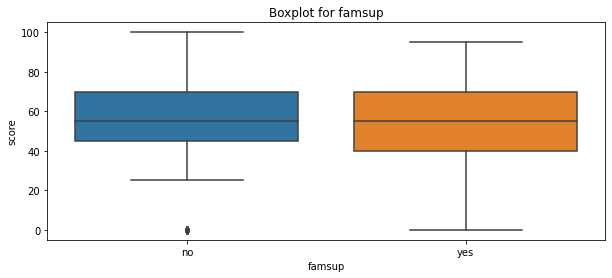

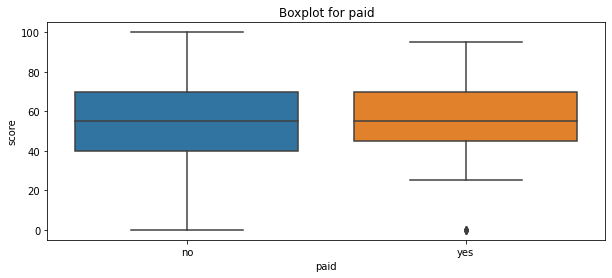

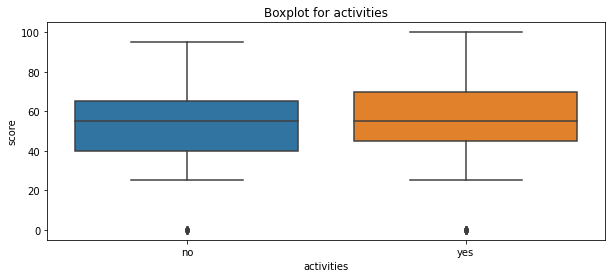

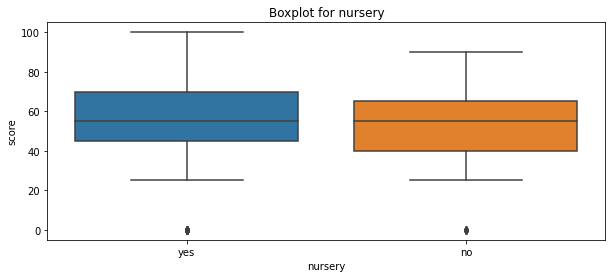

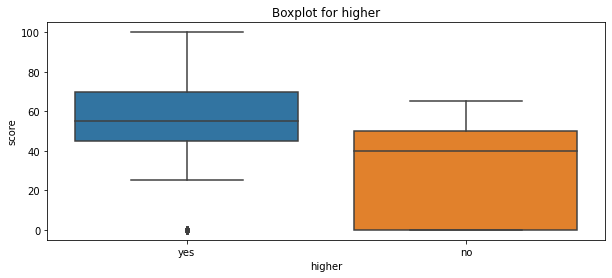

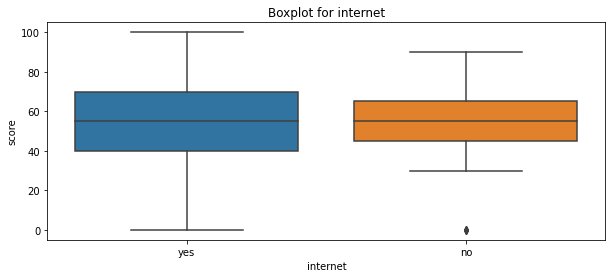

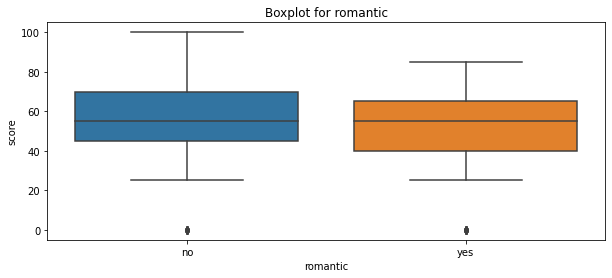

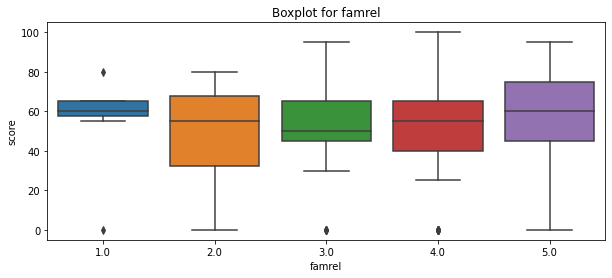

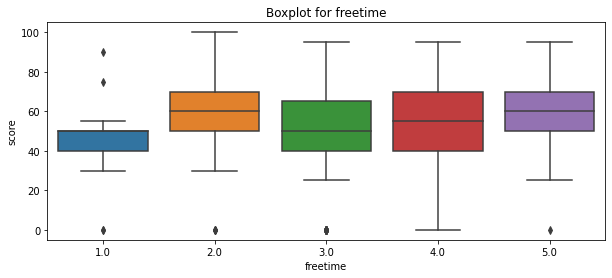

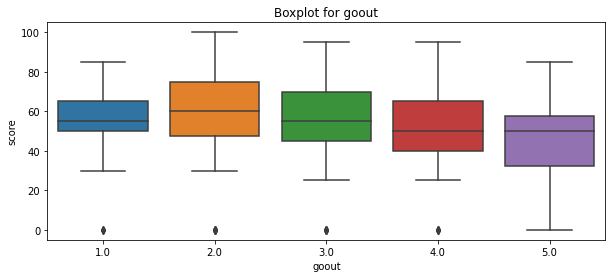

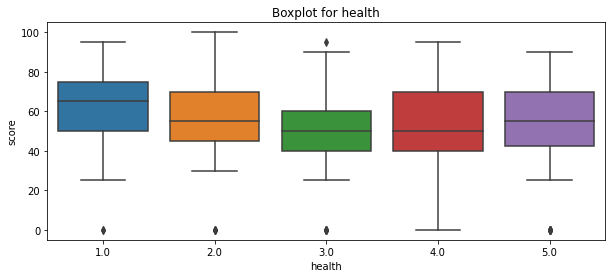

In [23]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
            'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

In [24]:
# Let's check if there is a statistical difference in the distribution of score 
# for nominative characteristics using Student's t test.

# Let's test the null hypothesis that the distributions of scores by different parameters are indistinguishable:

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
            'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


So, in our case, important variables that may have an impact on the 'score' are
sex, address, Medu, failure, higher, romantic, goout

In [25]:
# Create a new dataframe with important variables

students_for_model = students[[
    'sex', 'address', 'Medu', 'failures', 'higher', 'romantic', 'goout']].copy()
students_for_model.head()

,sex,address,Medu,failures,higher,romantic,goout
0,F,U,4.0,0.0,yes,no,4.0
1,F,U,1.0,0.0,yes,no,3.0
2,F,U,1.0,3.0,yes,None,2.0
3,F,U,4.0,0.0,yes,yes,2.0
4,F,U,3.0,0.0,yes,no,2.0


Итак, в результате EDA для анализа влияния условия жизни учащихся на их успеваемость по математике были получены следующие выводы:

В данных достаточно мало пустых значений. Выбросы найдены в столбцах с количеством пропущенных занятий, образованием отца и качеством семейных отношений. Это позволяет сделать вывод о достаточно хорошем качестве данных. 
Между числовыми переменными корреляционная связь очень слабая, поэтому ее можно не учитывать.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, address, Medu, failures, higher, romantic, goout.